# Goal
 To predict the following 48 hours of PM2.5, PM10, and O3 from previous PM2.5, PM10, NO2, CO, O3,and SO2 data.  Data are collected from 35 different observation sites at Beijing China.
 Recurrent neural network is used for forecasting. 

In [87]:
import pandas as pd
import numpy as np
from  sklearn.ensemble import RandomForestClassifier
import scipy as sc
import sklearn as sk
import matplotlib as plt
import statsmodels
import tensorflow as tf 
import keras

In [50]:
# Load dataset 
BJ_AirQ = pd.read_csv('/Users/richardtsai/Documents/DataScience/KDD/beijing_17_18_aq.csv',parse_dates=[1],index_col='utc_time')
print(BJ_AirQ.head())
print(BJ_AirQ.tail())

                           stationId  PM2.5   PM10    NO2   CO   O3  SO2
utc_time                                                                
2017-01-01 14:00:00  aotizhongxin_aq  453.0  467.0  156.0  7.2  3.0  9.0
2017-01-01 15:00:00  aotizhongxin_aq  417.0  443.0  143.0  6.8  2.0  8.0
2017-01-01 16:00:00  aotizhongxin_aq  395.0  467.0  141.0  6.9  3.0  8.0
2017-01-01 17:00:00  aotizhongxin_aq  420.0  484.0  139.0  7.4  3.0  9.0
2017-01-01 18:00:00  aotizhongxin_aq  453.0  520.0  157.0  7.6  4.0  9.0
                        stationId  PM2.5  PM10  NO2  CO  O3  SO2
utc_time                                                        
2018-01-31 11:00:00  zhiwuyuan_aq    NaN   NaN  NaN NaN NaN  NaN
2018-01-31 12:00:00  zhiwuyuan_aq    NaN   NaN  NaN NaN NaN  NaN
2018-01-31 13:00:00  zhiwuyuan_aq    NaN   NaN  NaN NaN NaN  NaN
2018-01-31 14:00:00  zhiwuyuan_aq    NaN   NaN  NaN NaN NaN  NaN
2018-01-31 15:00:00  zhiwuyuan_aq    NaN   NaN  NaN NaN NaN  NaN


In [53]:
BJ_AirQ.shape

(311010, 7)

In [54]:
# Missing data examine
print(BJ_AirQ.isnull().sum())

stationId        0
PM2.5        20389
PM10         83263
NO2          18651
CO           42813
O3           20421
SO2          18548
dtype: int64


In [55]:
BJ_AirQ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 311010 entries, 2017-01-01 14:00:00 to 2018-01-31 15:00:00
Data columns (total 7 columns):
stationId    311010 non-null object
PM2.5        290621 non-null float64
PM10         227747 non-null float64
NO2          292359 non-null float64
CO           268197 non-null float64
O3           290589 non-null float64
SO2          292462 non-null float64
dtypes: float64(6), object(1)
memory usage: 19.0+ MB


In [56]:
from datetime import datetime 


In [57]:
# Change time series
#BJ_AirQ['utc_time'] = pd.to_datetime(BJ_AirQ['utc_time'], format='%Y-%m-%d %H:%M:%S')
#BJ_AirQ.head()

In [58]:
from datetime import datetime
def parse(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
route ='/Users/richardtsai/Documents/DataScience/KDD/beijing_201802_201803_aq.csv'
BJ_AirQ_2018 = pd.read_csv(route,parse_dates=['utc_time'],date_parser=parse,index_col=1)
BJ_AirQ_2018[BJ_AirQ_2018.index=='2018-03-15 00:00:00']


,stationId,PM2.5,PM10,NO2,CO,O3,SO2
utc_time,,,,,,,
2018-03-15,aotizhongxin_aq,10.0,NaN,14.0,0.3,71.0,2.0
2018-03-15,badaling_aq,16.0,85.0,19.0,0.2,55.0,3.0
2018-03-15,beibuxinqu_aq,8.0,54.0,11.0,0.2,70.0,3.0
2018-03-15,daxing_aq,5.0,105.0,18.0,0.8,67.0,2.0
2018-03-15,dingling_aq,5.0,NaN,5.0,0.3,79.0,2.0
2018-03-15,donggaocun_aq,9.0,16.0,20.0,0.2,73.0,3.0
2018-03-15,dongsi_aq,8.0,32.0,11.0,0.3,72.0,2.0
2018-03-15,dongsihuan_aq,4.0,53.0,36.0,0.3,47.0,2.0
2018-03-15,fangshan_aq,4.0,78.0,18.0,0.3,82.0,2.0


In [59]:
# Concat two data source
BJ_Air_All=pd.concat([BJ_AirQ,BJ_AirQ_2018],axis=0,ignore_index=False)
# save to file
BJ_Air_All.to_csv('pollution.csv')

In [60]:
BJ_Air_All.shape

(360430, 7)

In [61]:
list(BJ_Air_All['stationId'].unique())

['aotizhongxin_aq',
 'badaling_aq',
 'beibuxinqu_aq',
 'daxing_aq',
 'dingling_aq',
 'donggaocun_aq',
 'dongsi_aq',
 'dongsihuan_aq',
 'fangshan_aq',
 'fengtaihuayuan_aq',
 'guanyuan_aq',
 'gucheng_aq',
 'huairou_aq',
 'liulihe_aq',
 'mentougou_aq',
 'miyun_aq',
 'miyunshuiku_aq',
 'nansanhuan_aq',
 'nongzhanguan_aq',
 'pingchang_aq',
 'pinggu_aq',
 'qianmen_aq',
 'shunyi_aq',
 'tiantan_aq',
 'tongzhou_aq',
 'wanliu_aq',
 'wanshouxigong_aq',
 'xizhimenbei_aq',
 'yanqin_aq',
 'yizhuang_aq',
 'yongdingmennei_aq',
 'yongledian_aq',
 'yufa_aq',
 'yungang_aq',
 'zhiwuyuan_aq']

In [62]:
#Missing value imputation using medain (which is not really right)
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imr = imr.fit(BJ_Air_All.iloc[:,1:])
imputed_data = imr.transform(BJ_Air_All.iloc[:,1:].values)
imputed_data

array([[453. , 467. , 156. ,   7.2,   3. ,   9. ],
       [417. , 443. , 143. ,   6.8,   2. ,   8. ],
       [395. , 467. , 141. ,   6.9,   3. ,   8. ],
       ...,
       [ 41. ,  71. ,  40. ,   0.7,  46. ,   5. ],
       [ 41. ,  71. ,  40. ,   0.7,  46. ,   5. ],
       [ 41. ,  71. ,  40. ,   0.7,  46. ,   5. ]])

In [63]:
col_names=['PM2.5','PM10','NO2','CO','O3','SO2']
BJ_Air_Impval = pd.DataFrame(imputed_data, columns=col_names)
BJ_Air_Impval.head()

,PM2.5,PM10,NO2,CO,O3,SO2
0,453.0,467.0,156.0,7.2,3.0,9.0
1,417.0,443.0,143.0,6.8,2.0,8.0
2,395.0,467.0,141.0,6.9,3.0,8.0
3,420.0,484.0,139.0,7.4,3.0,9.0
4,453.0,520.0,157.0,7.6,4.0,9.0


In [64]:
BJ_Air_12= BJ_Air_All.iloc[:,0] 
BJ_Air_12= pd.DataFrame(BJ_Air_12)
BJ_Air_12.reset_index(inplace=True)
BJ_Air_12.head

<bound method NDFrame.head of                   utc_time        stationId
0      2017-01-01 14:00:00  aotizhongxin_aq
1      2017-01-01 15:00:00  aotizhongxin_aq
2      2017-01-01 16:00:00  aotizhongxin_aq
3      2017-01-01 17:00:00  aotizhongxin_aq
4      2017-01-01 18:00:00  aotizhongxin_aq
5      2017-01-01 19:00:00  aotizhongxin_aq
6      2017-01-01 20:00:00  aotizhongxin_aq
7      2017-01-01 21:00:00  aotizhongxin_aq
8      2017-01-01 22:00:00  aotizhongxin_aq
9      2017-01-01 23:00:00  aotizhongxin_aq
10     2017-01-02 00:00:00  aotizhongxin_aq
11     2017-01-02 01:00:00  aotizhongxin_aq
12     2017-01-02 02:00:00  aotizhongxin_aq
13     2017-01-02 03:00:00  aotizhongxin_aq
14     2017-01-02 04:00:00  aotizhongxin_aq
15     2017-01-02 05:00:00  aotizhongxin_aq
16     2017-01-02 06:00:00  aotizhongxin_aq
17     2017-01-02 07:00:00  aotizhongxin_aq
18     2017-01-02 08:00:00  aotizhongxin_aq
19     2017-01-02 09:00:00  aotizhongxin_aq
20     2017-01-02 10:00:00  aotizhongxin_aq
21

#### Medain All Data base

In [65]:
BJ_imp_median= pd.concat([BJ_Air_12,BJ_Air_Impval],axis=1)
BJ_imp_median.tail()

,utc_time,stationId,PM2.5,PM10,NO2,CO,O3,SO2
360425,2018-03-31 11:00:00,zhiwuyuan_aq,41.0,71.0,40.0,0.7,46.0,5.0
360426,2018-03-31 12:00:00,zhiwuyuan_aq,41.0,71.0,40.0,0.7,46.0,5.0
360427,2018-03-31 13:00:00,zhiwuyuan_aq,41.0,71.0,40.0,0.7,46.0,5.0
360428,2018-03-31 14:00:00,zhiwuyuan_aq,41.0,71.0,40.0,0.7,46.0,5.0
360429,2018-03-31 15:00:00,zhiwuyuan_aq,41.0,71.0,40.0,0.7,46.0,5.0


In [66]:
print(BJ_imp_median.isnull().sum())

utc_time     0
stationId    0
PM2.5        0
PM10         0
NO2          0
CO           0
O3           0
SO2          0
dtype: int64


In [67]:
# Pick aotizhongxin_aq station
BJ_imp_median_aot = BJ_imp_median[BJ_imp_median['stationId']=='aotizhongxin_aq']
BJ_imp_median_aot.head()
BJ_imp_median_aot=BJ_imp_median_aot.set_index('utc_time')
BJ_imp_median_aot.head()

,stationId,PM2.5,PM10,NO2,CO,O3,SO2
utc_time,,,,,,,
2017-01-01 14:00:00,aotizhongxin_aq,453.0,467.0,156.0,7.2,3.0,9.0
2017-01-01 15:00:00,aotizhongxin_aq,417.0,443.0,143.0,6.8,2.0,8.0
2017-01-01 16:00:00,aotizhongxin_aq,395.0,467.0,141.0,6.9,3.0,8.0
2017-01-01 17:00:00,aotizhongxin_aq,420.0,484.0,139.0,7.4,3.0,9.0
2017-01-01 18:00:00,aotizhongxin_aq,453.0,520.0,157.0,7.6,4.0,9.0


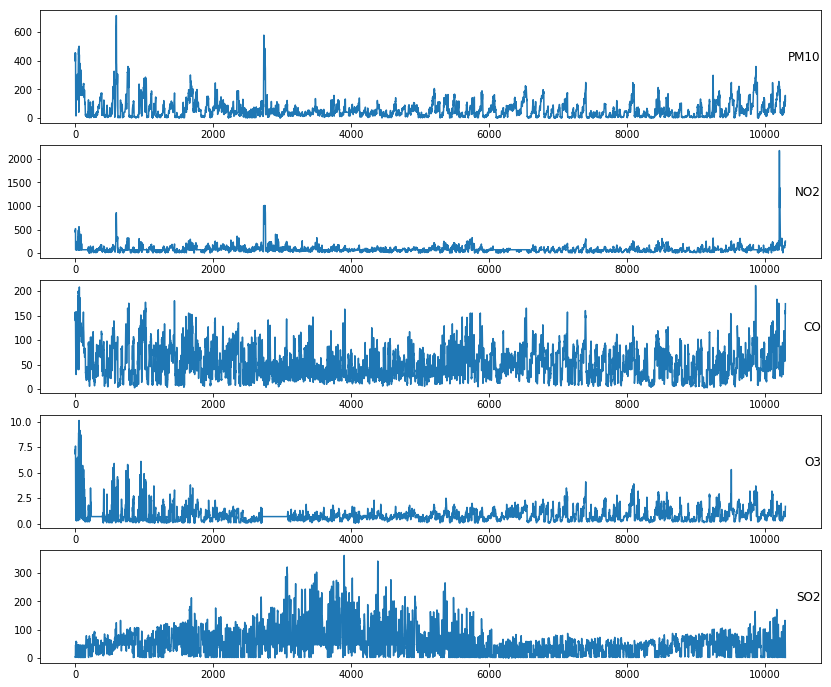

In [74]:
# Do a plot on aotizhongxin_aq station
values= BJ_imp_median_aot.iloc[:,1:].values

# specify columns
groups=[0,1,2,3,4]
i=1
# Plot each column
from matplotlib import pyplot
pyplot.figure(figsize=(14,12))
for group in groups: 
    pyplot.subplot(len(groups),1,i)
    pyplot.plot(values[:,group])
    pyplot.title(BJ_imp_median_aot.columns[group+2],y=0.5,loc='right')
    i+=1
pyplot.show()



In [75]:
from pandas import DataFrame
from pandas import concat
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg                    

In [76]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# load dataset
values = BJ_imp_median_aot.values
# integer encode direction
encoder = LabelEncoder()
values[:,0] = encoder.fit_transform(values[:,0])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed 
# drop columns we don't want to predict
reframed.drop(reframed.columns[[7,10,11,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0   0.634318   0.212247   0.735577       0.71   0.005525   
2        0.0   0.583685   0.201197   0.673077       0.67   0.002762   
3        0.0   0.552743   0.212247   0.663462       0.68   0.005525   
4        0.0   0.587904   0.220074   0.653846       0.73   0.005525   
5        0.0   0.634318   0.236648   0.740385       0.75   0.008287   

   var7(t-1)   var2(t)   var3(t)   var6(t)  
1   0.049080  0.583685  0.201197  0.002762  
2   0.042945  0.552743  0.212247  0.005525  
3   0.042945  0.587904  0.220074  0.005525  
4   0.049080  0.634318  0.236648  0.008287  
5   0.049080  0.600563  0.029926  0.005525  


In [77]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-3], train[:, -3:]
test_X, test_y = test[:, :-3], test[:, -3:]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(8760, 1, 7) (8760, 3) (1537, 1, 7) (1537, 3)


Train on 8760 samples, validate on 1537 samples
Epoch 1/50
 - 1s - loss: 0.0584 - val_loss: 0.0469
Epoch 2/50
 - 0s - loss: 0.0390 - val_loss: 0.0328
Epoch 3/50
 - 0s - loss: 0.0283 - val_loss: 0.0243
Epoch 4/50
 - 0s - loss: 0.0234 - val_loss: 0.0213
Epoch 5/50
 - 0s - loss: 0.0213 - val_loss: 0.0197
Epoch 6/50
 - 0s - loss: 0.0200 - val_loss: 0.0187
Epoch 7/50
 - 0s - loss: 0.0192 - val_loss: 0.0178
Epoch 8/50
 - 0s - loss: 0.0185 - val_loss: 0.0173
Epoch 9/50
 - 0s - loss: 0.0180 - val_loss: 0.0170
Epoch 10/50
 - 0s - loss: 0.0177 - val_loss: 0.0166
Epoch 11/50
 - 1s - loss: 0.0174 - val_loss: 0.0160
Epoch 12/50
 - 0s - loss: 0.0171 - val_loss: 0.0154
Epoch 13/50
 - 0s - loss: 0.0170 - val_loss: 0.0149
Epoch 14/50
 - 0s - loss: 0.0169 - val_loss: 0.0147
Epoch 15/50
 - 0s - loss: 0.0168 - val_loss: 0.0146
Epoch 16/50
 - 0s - loss: 0.0168 - val_loss: 0.0145
Epoch 17/50
 - 0s - loss: 0.0168 - val_loss: 0.0145
Epoch 18/50
 - 0s - loss: 0.0168 - val_loss: 0.0144
Epoch 19/50
 - 0s - loss:

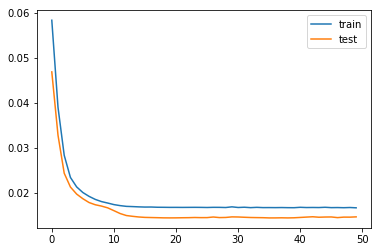

In [78]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(3))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [82]:
from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))


In [83]:
# invert scaling for forecast
inv_yhat = concatenate((test_X[:, :],yhat), axis=1)
inv_yhat.shape


(1537, 10)

In [84]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)



In [85]:
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-3:]
inv_yhat

array([[ 0.04987656,  0.02522705,  0.07662359],
       [ 0.05235966,  0.02352323,  0.083313  ],
       [ 0.05230414,  0.02354294,  0.07566064],
       ...,
       [ 0.18829817,  0.0890127 ,  0.18852909],
       [ 0.18449216,  0.10766999, -0.0053031 ],
       [ 0.22060339,  0.09716551,  0.00601732]], dtype=float32)

In [86]:
from math import sqrt
from sklearn.metrics import mean_squared_error
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 3))
inv_y = concatenate((test_y, test_X[:, :]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-3:]

# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.116
